In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
hr = pd.read_excel("Recruitement Raw Data v1.xlsx",'Data for analysis')

In [3]:
hr.head()

,ActivationDate,HireDate,TAT,OfferYear,AGE(Days),NEWS,Gender,Source,GradeCode,WorkStream,Education,State,TotalExp,RelevantExp,Region
0,2011-11-12,2012-01-02,51,2011,11916.0,SOUTH,Male,Placement Consultants,ASE3,Technology,B.COM,Andhra Pradesh,6,6,Infrastructure Management
1,2011-11-12,2012-01-02,51,2011,10284.0,SOUTH,Male,Placement Consultants,ASE2,Technology,B.Tech/B.E,Andhra Pradesh,4,4,Infrastructure Management
2,2011-10-27,2012-01-02,67,2011,15391.0,SOUTH,Male,Job Site,TM+,Technology,B.Tech/B.E,Karnataka,10,10,Information Services
3,2011-11-14,2012-01-02,49,2011,9964.0,SOUTH,Female,Referral,ASE2,Technology,B.Tech/B.E,Andhra Pradesh,2.3,2.3,Information Services
4,2011-11-10,2012-01-02,53,2011,13545.0,SOUTH,Male,Placement Consultants,ASE4,Technology,M.E / M.Tech,Karnataka,7.2,7.2,Information Services


In [5]:
hr.describe()

,TAT,OfferYear,AGE(Days)
count,5229.000000,5229.000000,5212.000000
mean,64.947791,2013.400268,10505.082118
std,33.218328,1.139071,1611.299892
min,4.000000,2011.000000,927.000000
25%,41.000000,2012.000000,9474.750000
50%,57.000000,2014.000000,10237.000000
75%,84.000000,2014.000000,11331.750000
max,363.000000,2015.000000,19493.000000


In [6]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5229 entries, 0 to 5228
Data columns (total 15 columns):
ActivationDate    5229 non-null datetime64[ns]
HireDate          5229 non-null datetime64[ns]
TAT               5229 non-null int64
OfferYear         5229 non-null int64
AGE(Days)         5212 non-null float64
NEWS              5229 non-null object
Gender            5229 non-null object
Source            5229 non-null object
GradeCode         5229 non-null object
WorkStream        5229 non-null object
Education         5229 non-null object
State             5229 non-null object
TotalExp          5178 non-null object
RelevantExp       5155 non-null object
Region            5229 non-null object
dtypes: datetime64[ns](2), float64(1), int64(2), object(10)
memory usage: 612.9+ KB


In [5]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
#sns.set_style('whitegrid')

In [6]:
#Convert Date columns to data datype
hr['ActivationDate'] = pd.to_datetime(hr['ActivationDate'],format='%Y-%m-%d')
hr['HireDate'] = pd.to_datetime(hr['HireDate'],format='%Y-%m-%d')

In [7]:
hr['ActivationDate_Month']=hr.ActivationDate.dt.month
hr['ActivationDate_Year']=hr.ActivationDate.dt.year
hr['HireDate_Month']=hr.HireDate.dt.month
hr['HireDate_Year']=hr.HireDate.dt.year

In [64]:
hr['AGE(Days)_years'].unique()

array([32.64657534, 28.17534247, 42.16712329, ..., 21.55342466,
       26.4739726 , 22.47671233])

In [8]:
hr['TotalExp']=hr['TotalExp'].astype(str)
hr['TotalExp_number'] = hr['TotalExp'].apply(pd.to_numeric, errors='coerce')

In [9]:
hr['AGE(Days)_years']=hr['AGE(Days)']/365

In [42]:
hr.head()

,ActivationDate,HireDate,TAT,OfferYear,AGE(Days),NEWS,Gender,Source,GradeCode,WorkStream,Education,State,TotalExp,RelevantExp,Region,ActivationDate_Month,ActivationDate_Year,HireDate_Month,HireDate_Year
0,2011-11-12,2012-01-02,51,2011,11916.0,SOUTH,Male,Placement Consultants,ASE3,Technology,B.COM,Andhra Pradesh,6,6,Infrastructure Management,11,2011,1,2012
1,2011-11-12,2012-01-02,51,2011,10284.0,SOUTH,Male,Placement Consultants,ASE2,Technology,B.Tech/B.E,Andhra Pradesh,4,4,Infrastructure Management,11,2011,1,2012
2,2011-10-27,2012-01-02,67,2011,15391.0,SOUTH,Male,Job Site,TM+,Technology,B.Tech/B.E,Karnataka,10,10,Information Services,10,2011,1,2012
3,2011-11-14,2012-01-02,49,2011,9964.0,SOUTH,Female,Referral,ASE2,Technology,B.Tech/B.E,Andhra Pradesh,2.3,2.3,Information Services,11,2011,1,2012
4,2011-11-10,2012-01-02,53,2011,13545.0,SOUTH,Male,Placement Consultants,ASE4,Technology,M.E / M.Tech,Karnataka,7.2,7.2,Information Services,11,2011,1,2012


In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)},palette=flatui)

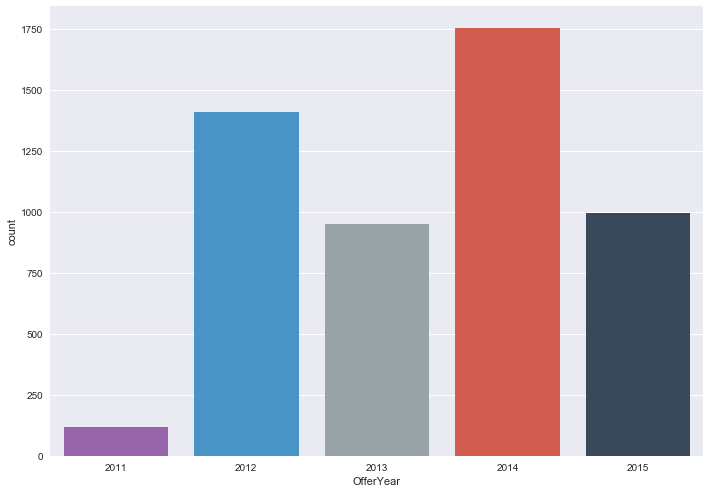

In [12]:
sns.countplot(x='OfferYear',data=hr)

TypeError: unsupported operand type(s) for /: 'str' and 'float'

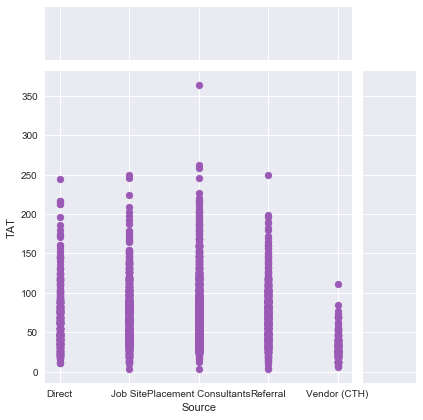

In [210]:
sns.jointplot(x='Source',y='TAT',data=hr)

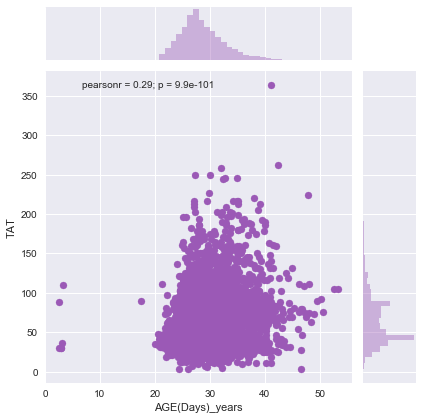

In [161]:
# More time on site, more money spent.
#plt.subplots(figsize=(20,15))
sns.jointplot(x='AGE(Days)_years',y='TAT',data=hr)

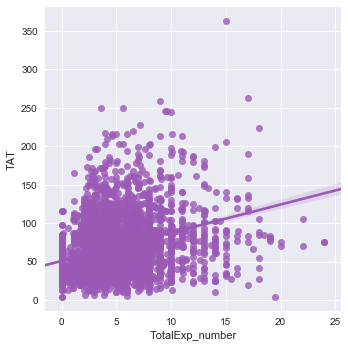

In [167]:
sns.lmplot(x='TotalExp_number',y='TAT',data=hr)

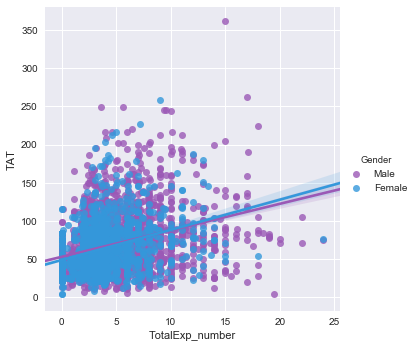

In [176]:
sns.lmplot(x='TotalExp_number',y='TAT',hue='Gender',data=hr)

In [ ]:
sns.lmplot(x='TotalExp_number',y='TAT',hue='Gender',data=hr)

In [26]:
def condition(edu):
    if edu.startswith(("M","P")):
        return 'Masters'
    return 'Bachelors'

In [27]:
hr['Education_Type']=hr['Education'].apply(condition)

In [193]:
hr['Education_Type']

0       Bachelors
1       Bachelors
2       Bachelors
3       Bachelors
4         Masters
5       Bachelors
6       Bachelors
7       Bachelors
8       Bachelors
9         Masters
10      Bachelors
11      Bachelors
12      Bachelors
13      Bachelors
14      Bachelors
15      Bachelors
16      Bachelors
17      Bachelors
18      Bachelors
19        Masters
20        Masters
21      Bachelors
22      Bachelors
23        Masters
24      Bachelors
25      Bachelors
26      Bachelors
27      Bachelors
28      Bachelors
29      Bachelors
          ...    
5199    Bachelors
5200      Masters
5201      Masters
5202      Masters
5203      Masters
5204      Masters
5205      Masters
5206    Bachelors
5207    Bachelors
5208      Masters
5209      Masters
5210      Masters
5211      Masters
5212    Bachelors
5213    Bachelors
5214      Masters
5215      Masters
5216    Bachelors
5217    Bachelors
5218      Masters
5219      Masters
5220      Masters
5221    Bachelors
5222      Masters
5223    Ba

True

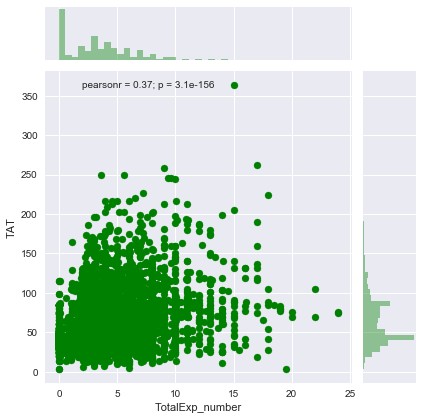

In [178]:
sns.jointplot(x='TotalExp_number',y='TAT',data=hr,color='green')

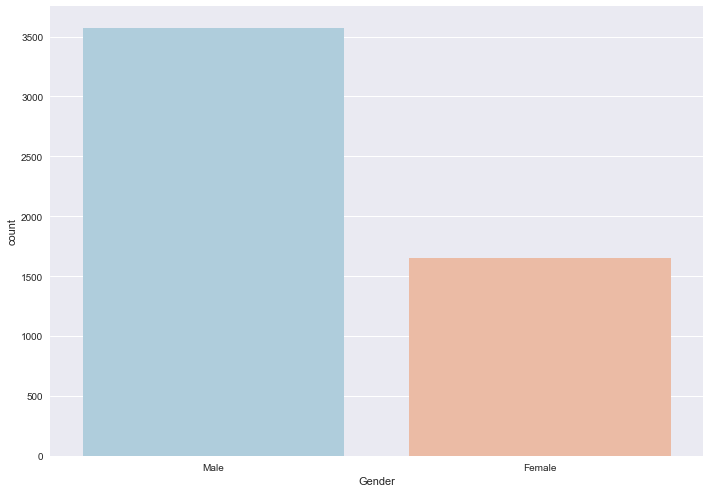

In [174]:
sns.countplot(x='Gender',data=hr,palette='RdBu_r')

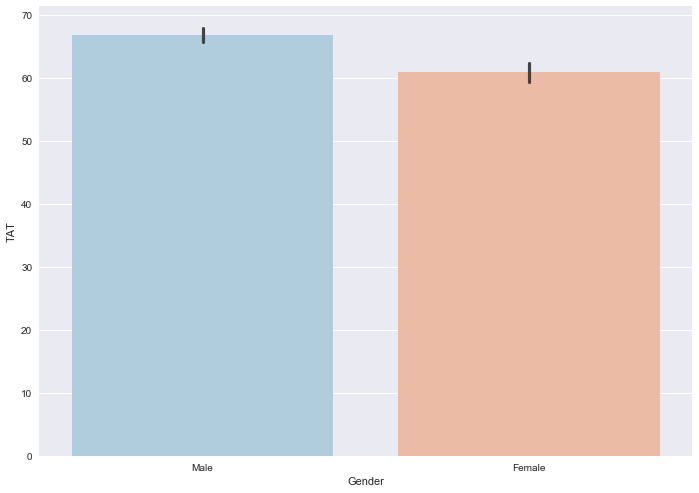

In [170]:
sns.barplot(x='Gender',y='TAT',data=hr,palette='RdBu_r')

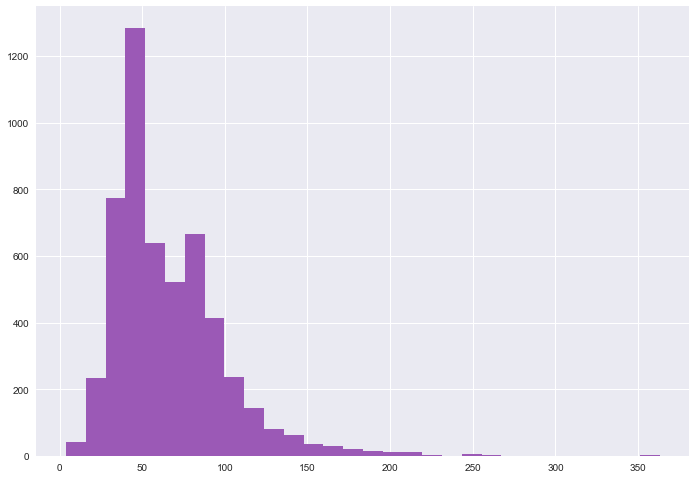

In [100]:
hr['TAT'].hist(bins=30)

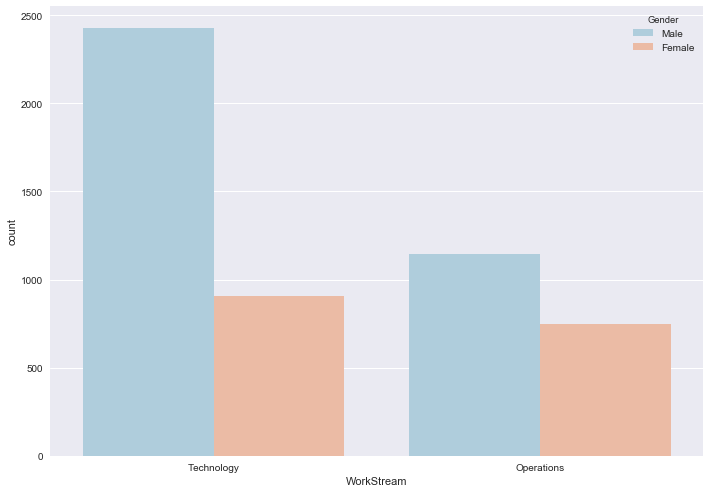

In [171]:
sns.countplot(x='WorkStream',hue='Gender',data=hr,palette='RdBu_r')

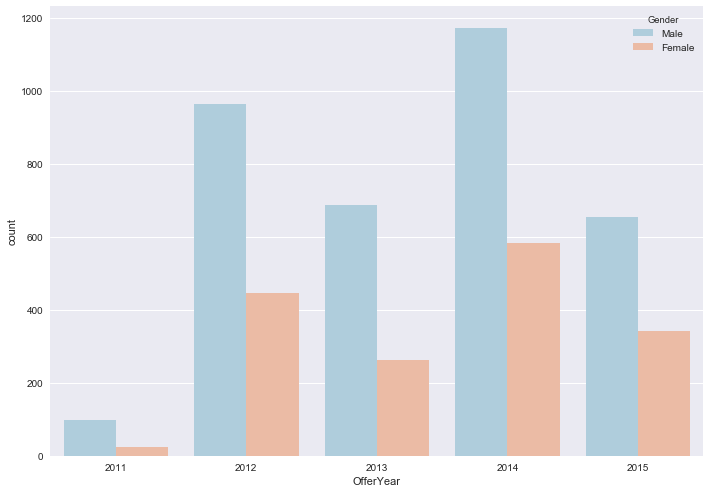

In [173]:
sns.countplot(x='OfferYear',hue='Gender',data=hr,palette='RdBu_r')

In [ ]:
sns.tsplot(hr['OfferYear'], hr[])

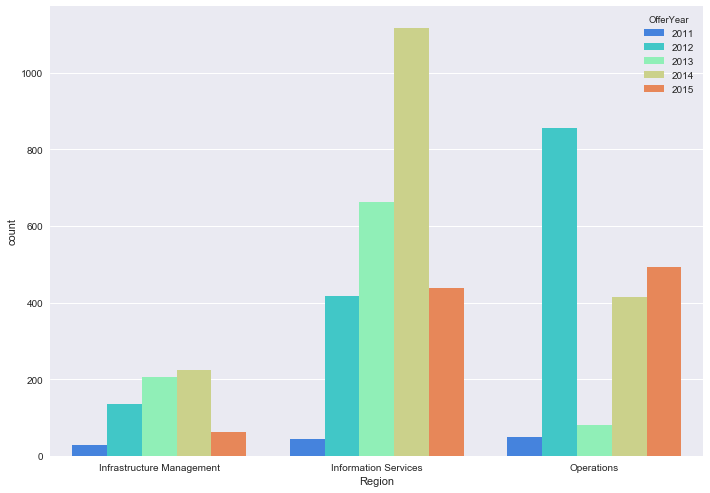

In [107]:
sns.countplot(x='Region',hue='Pclass',data=hr,palette='rainbow')

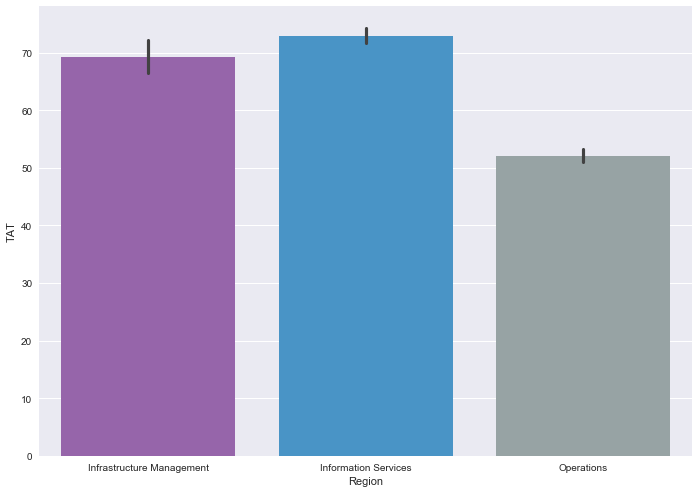

In [150]:
sns.barplot(x='Region',y='TAT',data=hr)

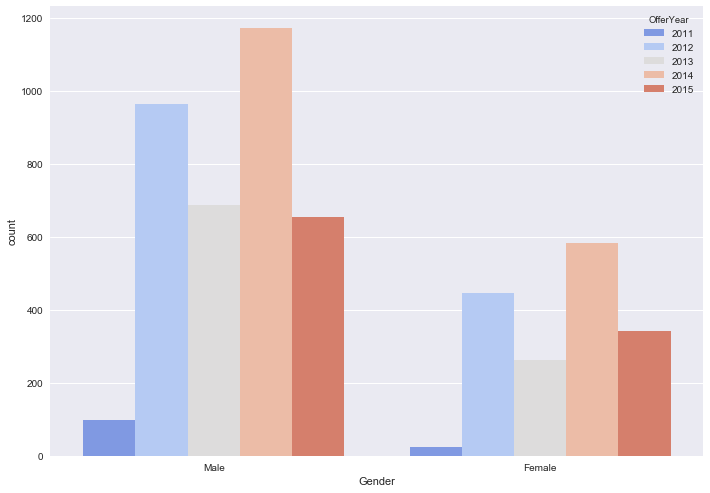

In [115]:
sns.countplot(x='Gender',hue='OfferYear',data=hr,palette='coolwarm')

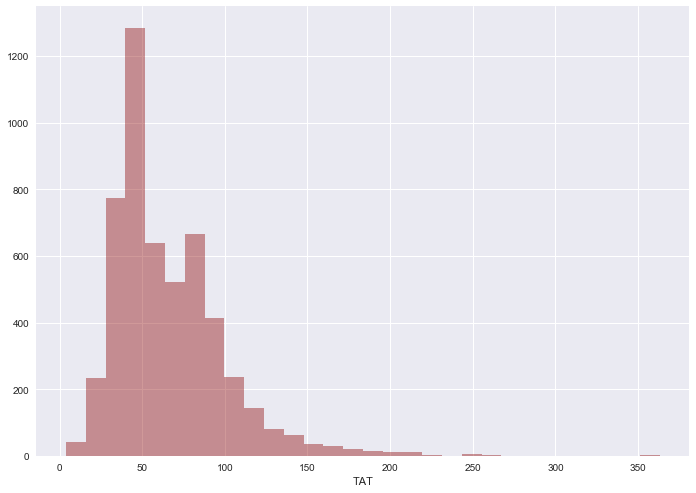

In [114]:
sns.distplot(hr['TAT'].dropna(),kde=False,color='darkred',bins=30)

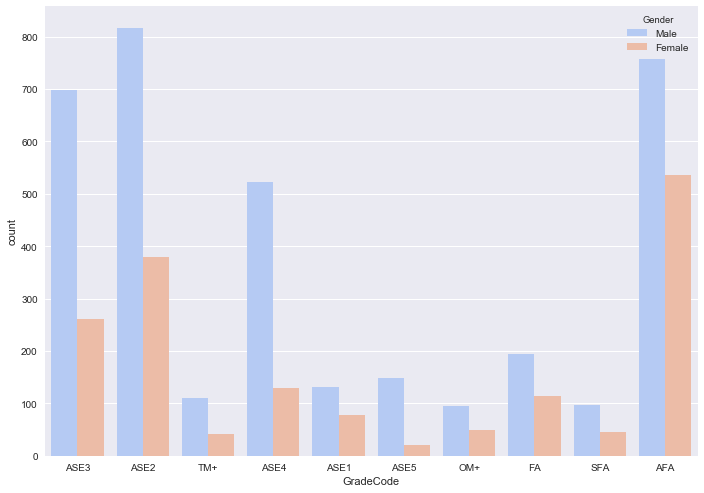

In [118]:
sns.countplot(x='GradeCode',hue='Gender',data=hr,palette='coolwarm')

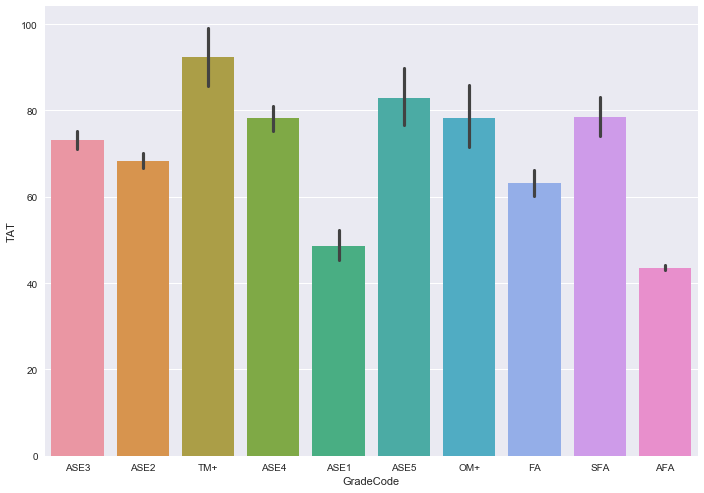

In [175]:
sns.barplot(x='GradeCode',y='TAT',data=hr)

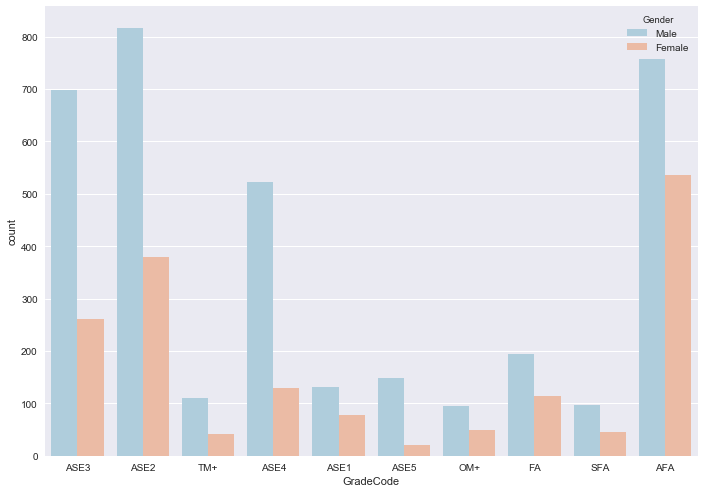

In [197]:
sns.countplot(x='GradeCode',hue='Gender',data=hr,palette='RdBu_r')

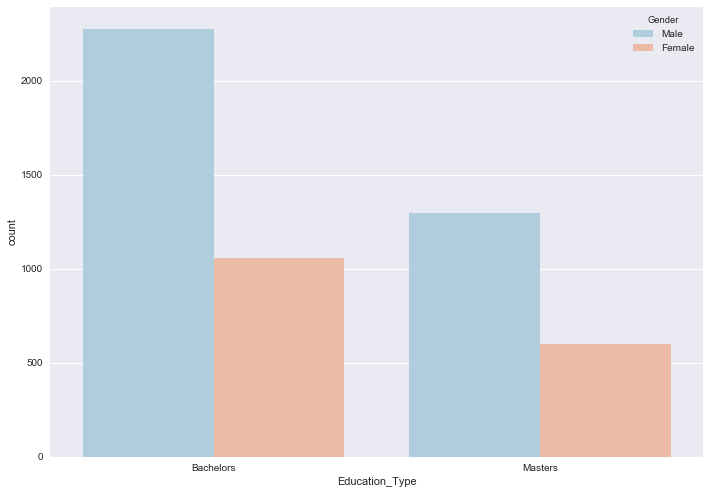

In [198]:
sns.countplot(x='Education_Type',hue='Gender',data=hr,palette='RdBu_r')

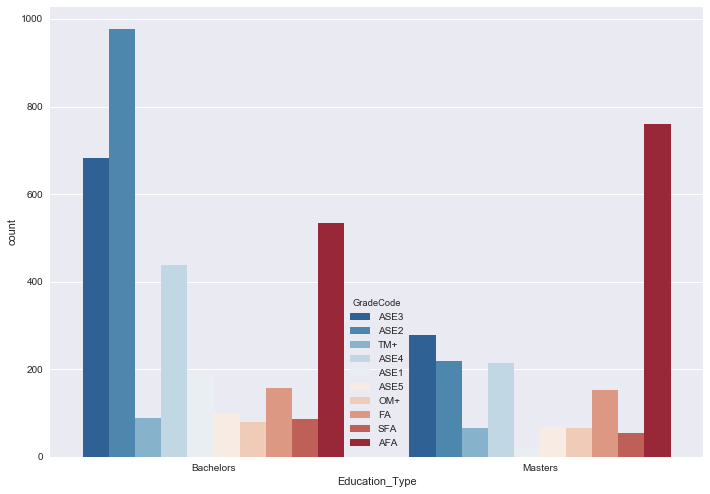

In [28]:
sns.countplot(x='Education_Type',hue='GradeCode',data=hr,palette='RdBu_r')

In [209]:
sns.barplot(x='Source',y='GradeCode',data=hr,palette='rainbow')

ValueError: Neither the `x` nor `y` variable appears to be numeric.

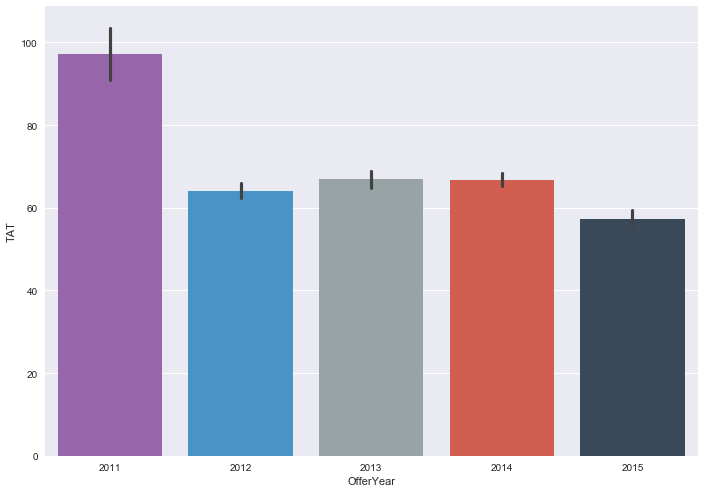

In [163]:
sns.barplot(x='OfferYear',y='TAT',data=hr)

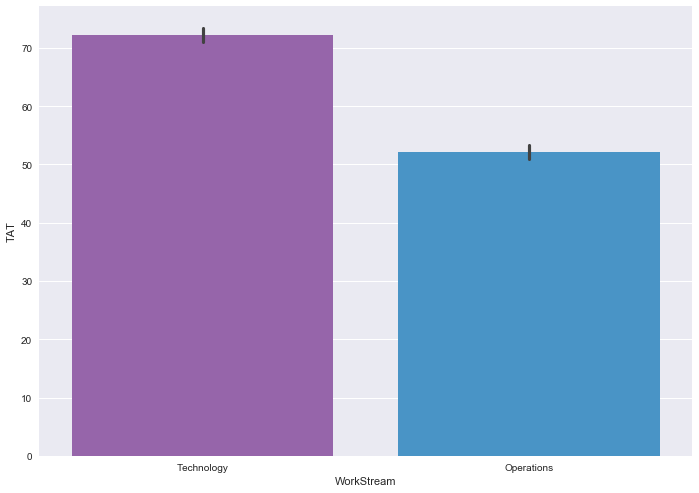

In [148]:
sns.barplot(x='WorkStream',y='TAT',data=hr)

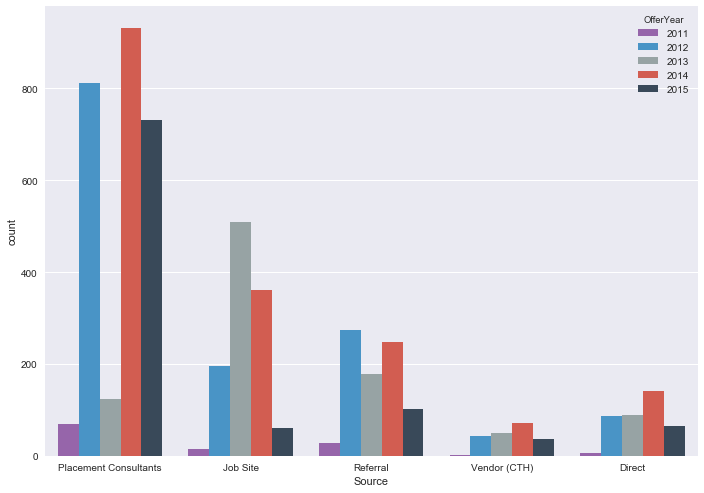

In [199]:
sns.countplot(x='Source',hue='OfferYear',data=hr)

In [206]:
#sns.countplot(x='Source',hue='OfferYear',data=hr)
#sns.regplot(x="Source", y="GradeCode", data=hr)
hr.plot.scatter(x="Source", y="GradeCode")

ValueError: scatter requires x column to be numeric

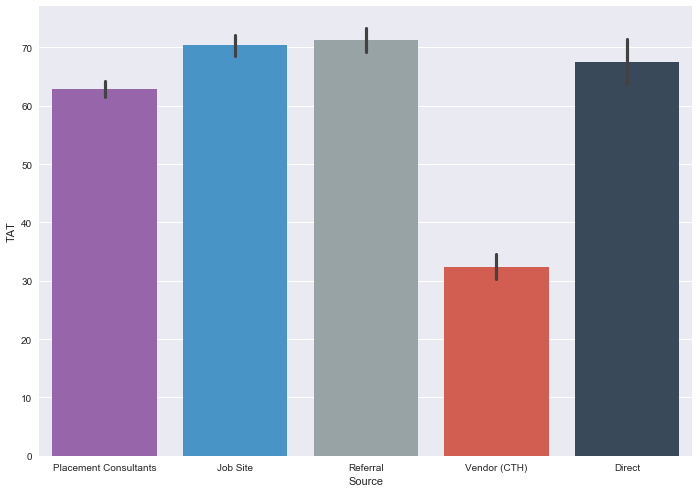

In [125]:
sns.barplot(x='Source',y='TAT',data=hr)

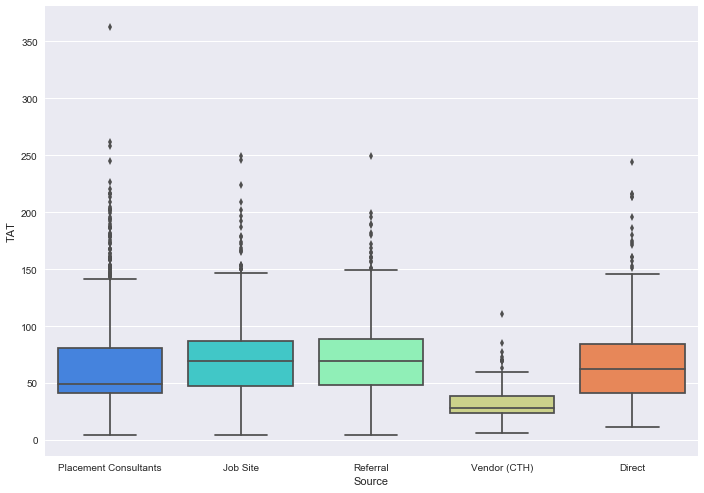

In [146]:
sns.boxplot(x="Source", y="TAT", data=hr,palette='rainbow')

,TAT,OfferYear,State
0,51,2011,Andhra Pradesh
1,51,2011,Andhra Pradesh
2,67,2011,Karnataka
3,49,2011,Andhra Pradesh
4,53,2011,Karnataka


In [132]:
hr_state=hr.groupby('State').mean()[['TAT']]

In [133]:
hr_state.head()

,TAT
State,
New Delhi,99.000000
Andaman and Nicobar Islands,72.833333
Andhara Pradesh,70.333333
Andhra Pradesh,65.003066
Andhra Pradesh,119.000000


In [137]:
hr_state=hr_state.sort_values('TAT')

In [139]:
hr_state=hr_state.head(10)

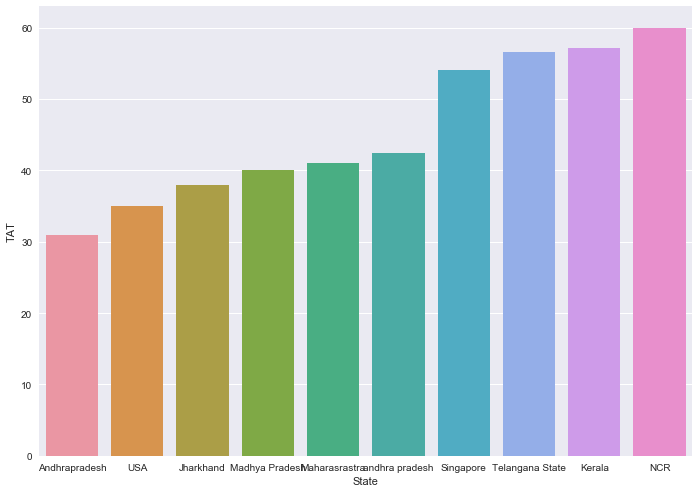

In [140]:
sns.barplot(x=hr_state.index,y='TAT',data=hr_state)

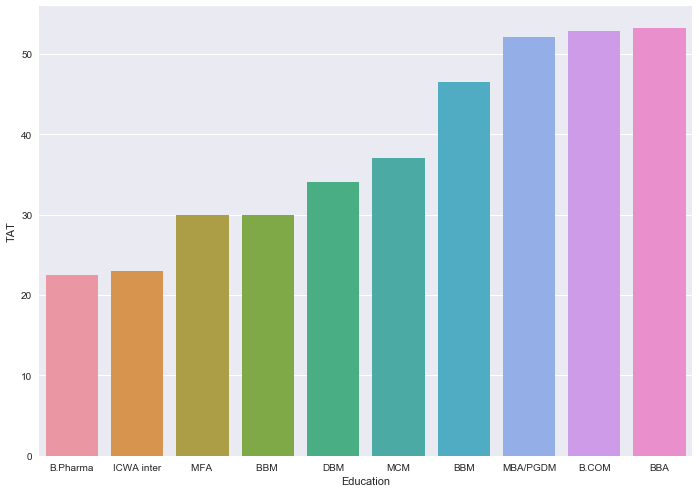

In [141]:
hr_edu=hr.groupby('Education').mean()[['TAT']]
hr_edu=hr_edu.sort_values('TAT')
hr_edu=hr_edu.head(10)
sns.barplot(x=hr_edu.index,y='TAT',data=hr_edu)

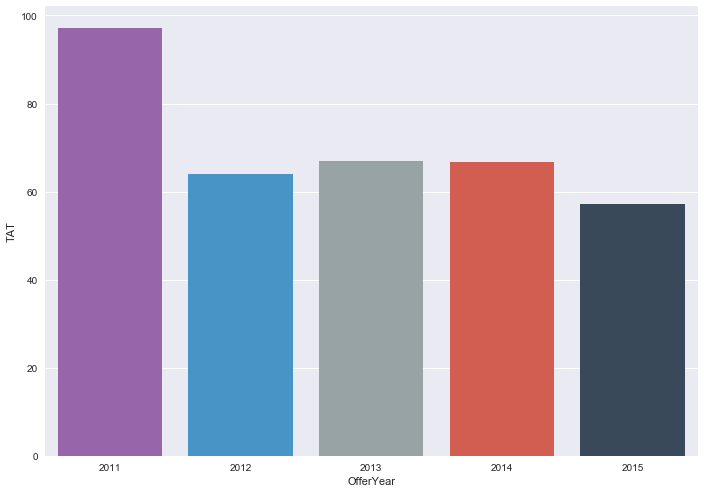

In [142]:
hr_OfferYear=hr.groupby('OfferYear').mean()[['TAT']]
hr_OfferYear=hr_OfferYear.sort_values('TAT')
hr_OfferYear=hr_OfferYear.head(10)
sns.barplot(x=hr_OfferYear.index,y='TAT',data=hr_OfferYear,order='TAT')

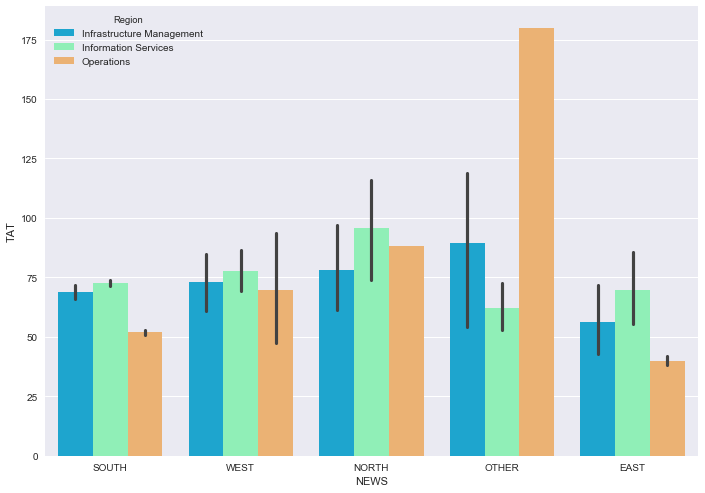

In [202]:
sns.barplot(x="NEWS", y="TAT", data=hr,palette='rainbow',hue='Region')

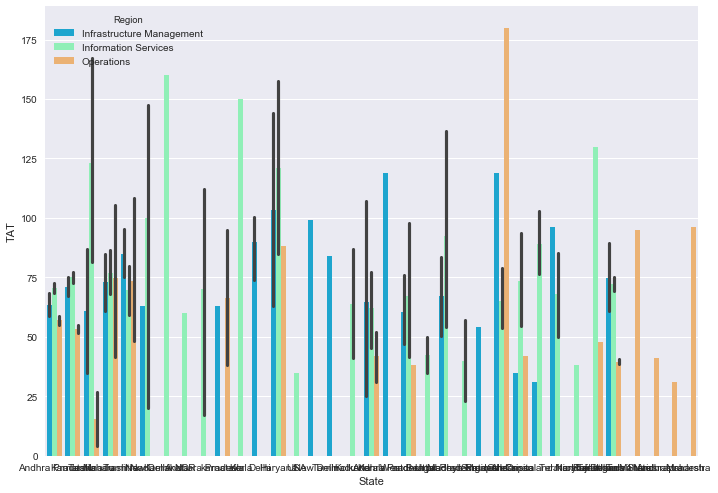

In [204]:
sns.barplot(x="State", y="TAT", data=hr,palette='rainbow',hue='Region')

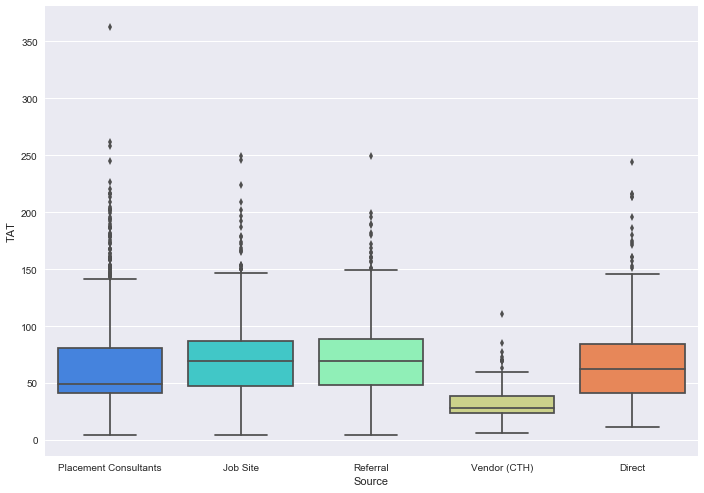

In [145]:
sns.boxplot(x="Source", y="TAT", data=hr,palette='rainbow')

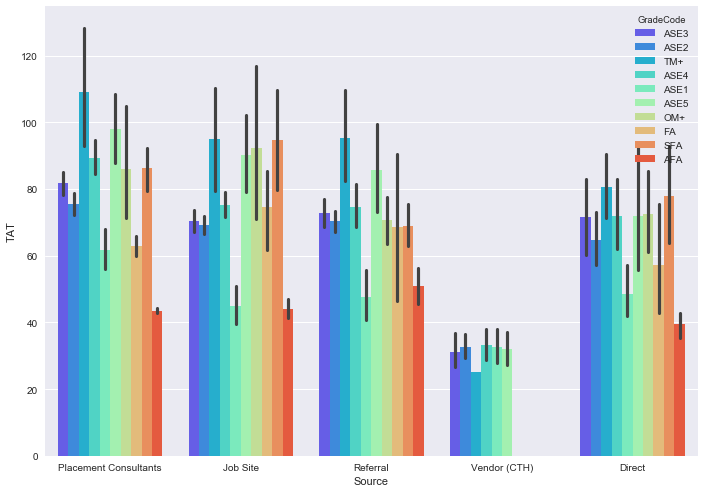

In [24]:
sns.barplot(x="Source", y="TAT", data=hr,palette='rainbow',hue='GradeCode')

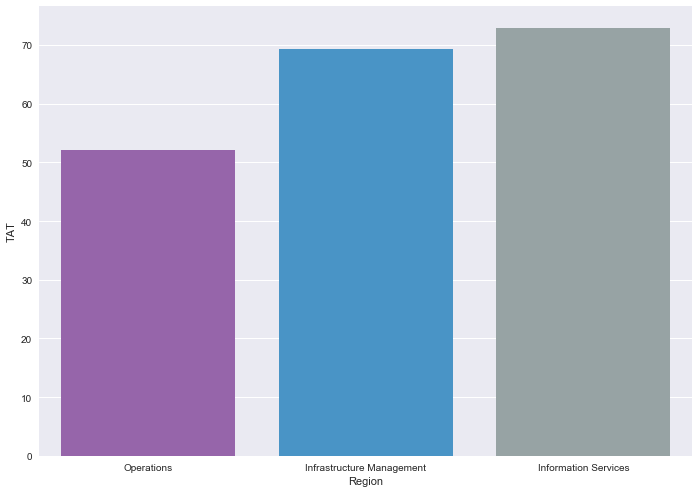

In [149]:
hr_Region=hr.groupby('Region').mean()[['TAT']]
hr_Region=hr_Region.sort_values('TAT')
hr_Region=hr_Region.head(10)
sns.barplot(x=hr_Region.index,y='TAT',data=hr_Region)

In [153]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5229 entries, 0 to 5228
Data columns (total 21 columns):
ActivationDate          5229 non-null datetime64[ns]
HireDate                5229 non-null datetime64[ns]
TAT                     5229 non-null int64
OfferYear               5229 non-null int64
AGE(Days)               5212 non-null float64
NEWS                    5229 non-null object
Gender                  5229 non-null object
Source                  5229 non-null object
GradeCode               5229 non-null object
WorkStream              5229 non-null object
Education               5229 non-null object
State                   5229 non-null object
TotalExp                5229 non-null object
RelevantExp             5155 non-null object
Region                  5229 non-null object
ActivationDate_Month    5229 non-null int64
ActivationDate_Year     5229 non-null int64
HireDate_Month          5229 non-null int64
HireDate_Year           5229 non-null int64
TotalExp_number         478

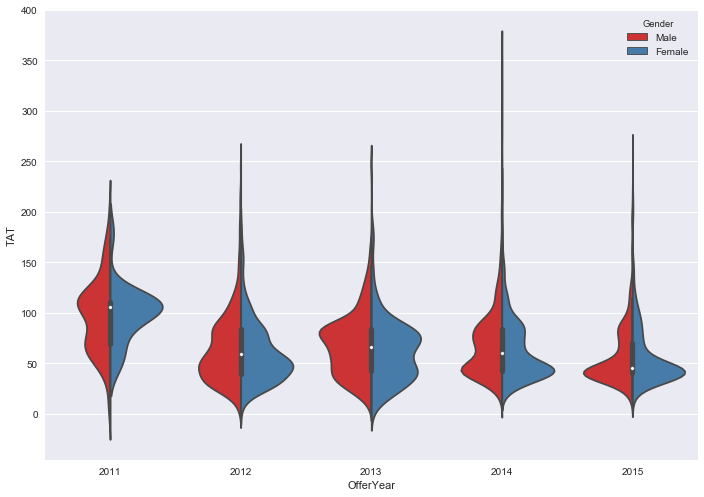

In [152]:
sns.violinplot(x="OfferYear", y="TAT", data=hr,hue='Gender',split=True,palette='Set1')

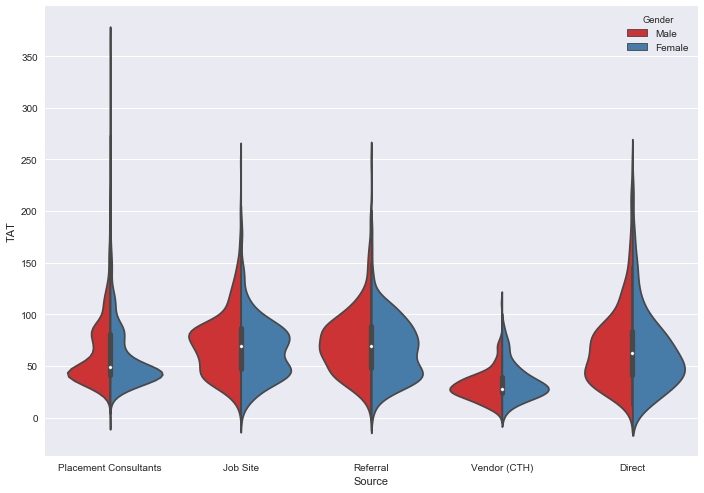

In [155]:
sns.violinplot(x="Source", y="TAT", data=hr,hue='Gender',split=True,palette='Set1')

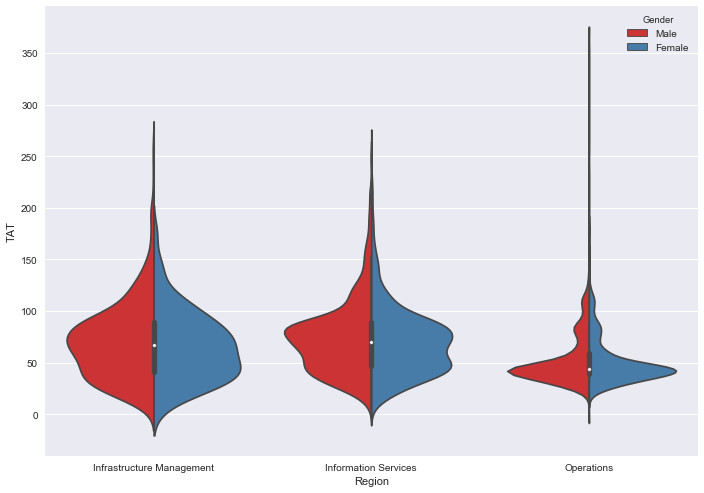

In [157]:
sns.violinplot(x="Region", y="TAT", data=hr,hue='Gender',split=True,palette='Set1')

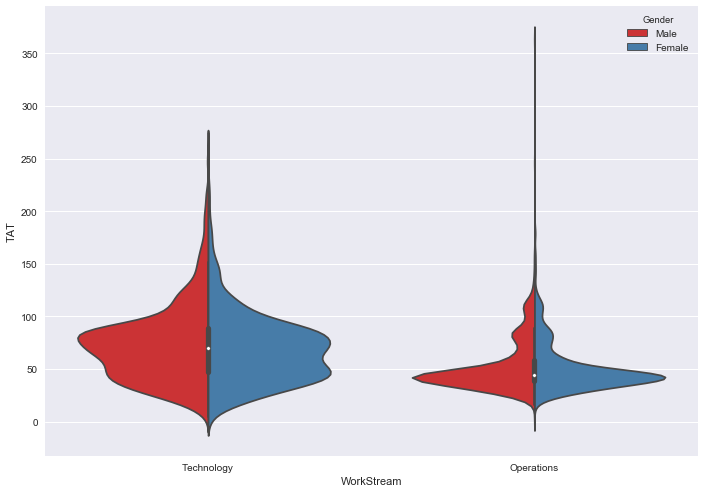

In [158]:
sns.violinplot(x="WorkStream", y="TAT", data=hr,hue='Gender',split=True,palette='Set1')

In [200]:
sns.violinplot(x="NEWS", y="TAT", data=hr,hue='Region',split=True,palette='Set1')

ValueError: There must be exactly two hue levels to use `split`.'

In [216]:
hr_s_g=hr.groupby(['Source','GradeCode']).count()[['TAT']]

In [217]:
hr_s_g.head()

TAT
Source GradeCode     
Direct AFA         21
       ASE1        43
       ASE2        70
       ASE3        61
       ASE4        59

In [219]:
hr_s_g=hr_s_g.reset_index()

In [220]:
hr_s_g.head()

,Source,GradeCode,TAT
0,Direct,AFA,21
1,Direct,ASE1,43
2,Direct,ASE2,70
3,Direct,ASE3,61
4,Direct,ASE4,59


In [223]:
hr_s_g=hr_s_g.rename(columns={'TAT':'Count'})

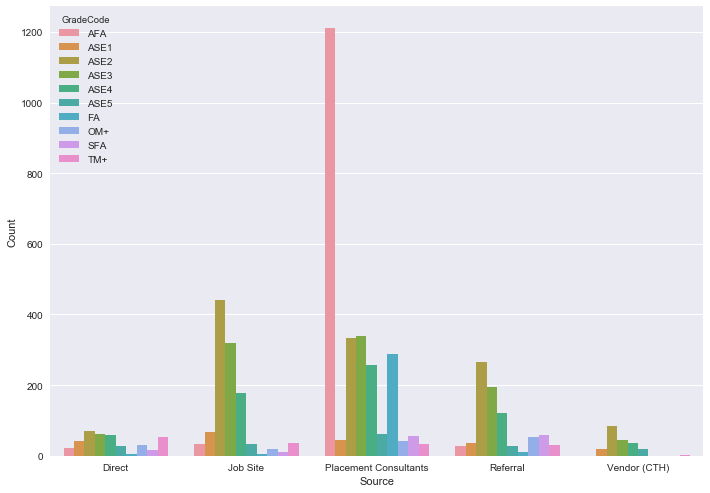

In [226]:
sns.barplot(x='Source',y='Count',hue='GradeCode',data=hr_s_g)

In [18]:
hr['ActivationDate_Q']=hr.ActivationDate.dt.quarter

In [19]:
hr['ActivationDate_YearQ']=hr['ActivationDate_Year'].astype(str)+hr['ActivationDate_Q'].astype(str)

In [236]:
hr_offer=hr.groupby(['ActivationDate_YearQ','GradeCode']).count()[['TAT']]

In [240]:
hr_offer.head()

,ActivationDate_YearQ,GradeCode,TAT
0,20112,ASE4,1
1,20113,ASE2,5
2,20113,ASE3,9
3,20113,ASE4,9
4,20113,ASE5,4


In [239]:
hr_offer=hr_offer.reset_index()

In [241]:
hr_offer=hr_offer.rename(columns={'TAT':'Count'})

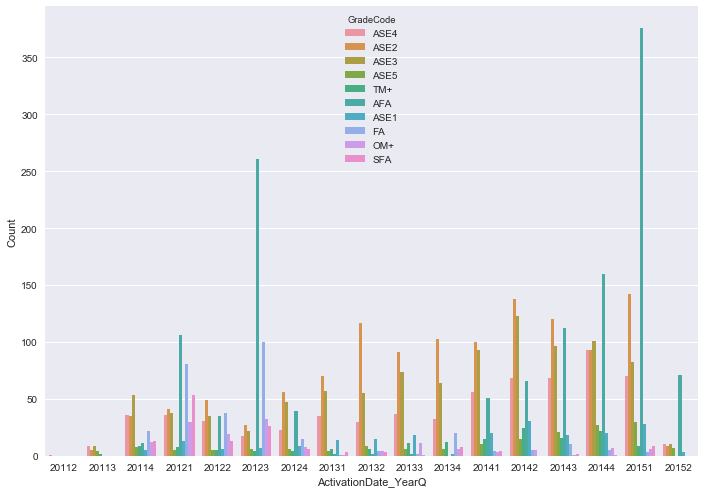

In [242]:
sns.barplot(x='ActivationDate_YearQ',y='Count',hue='GradeCode',data=hr_offer)

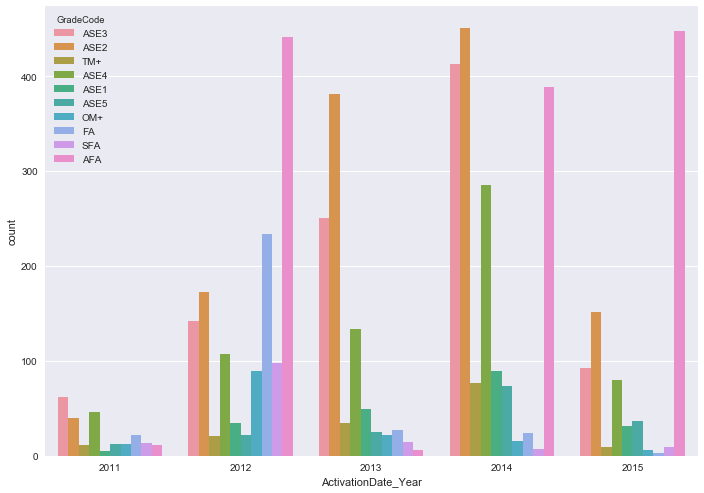

In [243]:
sns.countplot(x='ActivationDate_Year',hue='GradeCode',data=hr)

In [ ]:
sns.countplot(x='AGE(Days)_years',hue='GradeCode',data=hr)

AttributeError: 'str' object has no attribute 'conjugate'

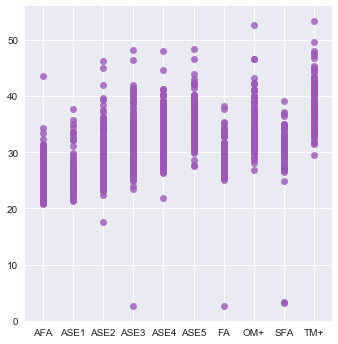

In [15]:
sns.lmplot(x='GradeCode',y='AGE(Days)_years',data=hr,hue='Gender')

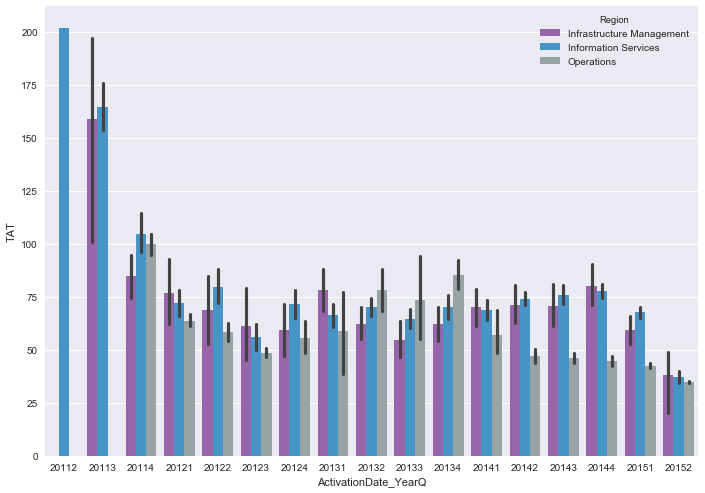

In [20]:
sns.barplot(x='ActivationDate_YearQ',y='TAT',hue='Region',data=hr)

In [ ]:
sns.countplot